In [ ]:
%load_ext autoreload
%autoreload 2
from model import OpinionModel
from agent import OpinionAgent

In [25]:
my_model = OpinionModel(N=100,
                        mu=0.5,
                        init_u=0.5, extremist_ratio=0.1, d=0.2, extremist_u=0.05, regime="all")

In [26]:
my_model.schedule._agents[0].x

-0.9720024459419798

In [27]:
for i in range(100):
    my_model.step()

AttributeError: 'int' object has no attribute 'x'

In [20]:
my_model.schedule._agents[0].x

-0.9378565558498763

In [22]:
my_model.datacollector.get_agent_vars_dataframe().loc[(slice(0,99), 23), :]

,,Opinion,Uncertainty,Delta X,Delta U
Step,AgentID,,,,
0,23,-0.512413,0.500000,0.000000e+00,0.000000e+00
1,23,-0.512413,0.500000,0.000000e+00,0.000000e+00
2,23,-0.483913,0.500000,2.850049e-02,0.000000e+00
3,23,-0.458857,0.500000,2.505610e-02,0.000000e+00
4,23,-0.411637,0.500000,4.722018e-02,0.000000e+00
...,...,...,...,...,...
95,23,-0.111596,0.494954,4.928796e-09,1.631254e-09
96,23,-0.111596,0.494954,0.000000e+00,0.000000e+00
97,23,-0.111596,0.494954,0.000000e+00,0.000000e+00


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='Step', ylabel='Opinion'>

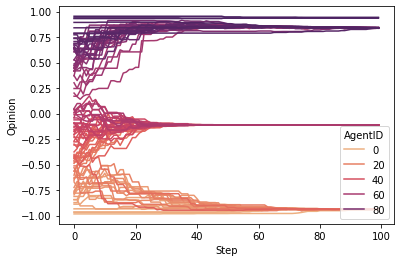

In [24]:
opinions = my_model.datacollector.get_agent_vars_dataframe().reset_index()
sns.lineplot(data=opinions, x='Step', y='Opinion', hue='AgentID', palette="flare")